# Sentiment-Based Product Recommendation System for Ebuss

### Problem Statement
Ebuss plans to improve its product recommendation system by integrating user sentiment extracted from product reviews and ratings. This project involves developing a sentiment analysis model alongside a collaborative filtering–based recommendation system, and combining both approaches to deliver sentiment-aware product recommendations tailored to users.

### Dataset Attributes Description

The following table describes the attributes present in the Product Reviews dataset
along with their definitions.

| Attribute | Attribute Description |
|---------|-----------------------|
| **id** | Unique identity number to identify each unique review given by a user for a particular product |
| **brand** | Name of the brand of the product for which the review and rating are provided |
| **categories** | Category of the product (e.g., household essentials, books, personal care products, cosmetics, electrical appliances, etc.) |
| **manufacturer** | Name of the manufacturer of the product |
| **name** | Name of the product to which the user has given a review or rating |
| **reviews_date** | Date on which the review was added by the user |
| **reviews_didPurchase** | Indicates whether the user actually purchased the product |
| **reviews_doRecommend** | Indicates whether the user would recommend the product |
| **reviews_rating** | Rating given by the user for the product |
| **reviews_text** | Review text provided by the user for the product |
| **reviews_title** | Title of the review given by the user |
| **reviews_userCity** | City of residence of the user |
| **reviews_userProvince** | Province/state of residence of the user |
| **reviews_username** | Unique identifier for each user in the dataset |
| **user_sentiment** | Overall sentiment of the user for a product (Positive or Negative) |

# Imports

In [ ]:
!pip install pandas 
!pip install seaborn
!pip install matplotlib
!pip install nltk
!pip install wordcloud
!pip install scikit-learn


[notice] A new release of pip is available: 24.0 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [114]:
# Import libraries

# Read dataset
import pandas as pd
import numpy as np

# Data cleaning, preprocessing and visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Text processing
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Feature extraction
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Model building and evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

# Recommendation system
from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.filterwarnings("ignore")

# Data Cleaning and Pre-Processing

In [115]:
#Load the dataset
df = pd.read_csv("sample30.csv")

In [116]:
#Explore the dataset
df.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative


In [117]:
#Get the dataset shape
print("Dataset shape:", df.shape)

Dataset shape: (30000, 15)


In [118]:
#Get the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

In [119]:
#Get the dataset statistics
df.describe()

,reviews_rating
count,30000.000000
mean,4.483133
std,0.988441
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [120]:
#Get the dataset columns
print("Dataset columns:", df.columns)

Dataset columns: Index(['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date',
       'reviews_didPurchase', 'reviews_doRecommend', 'reviews_rating',
       'reviews_text', 'reviews_title', 'reviews_userCity',
       'reviews_userProvince', 'reviews_username', 'user_sentiment'],
      dtype='object')


In [121]:
#Get the dataset data types
df.dtypes

id                      object
brand                   object
categories              object
manufacturer            object
name                    object
reviews_date            object
reviews_didPurchase     object
reviews_doRecommend     object
reviews_rating           int64
reviews_text            object
reviews_title           object
reviews_userCity        object
reviews_userProvince    object
reviews_username        object
user_sentiment          object
dtype: object

In [122]:
# Total missing values

missing_vals = df.isnull().sum().sort_values(ascending=False)
missing_percentage = (  missing_vals / len(df)) * 100

missing_df = pd.DataFrame({
    "Missing Count": missing_vals,
    "Missing %": missing_percentage
})

missing_df

,Missing Count,Missing %
reviews_userProvince,29830,99.433333
reviews_userCity,28071,93.570000
reviews_didPurchase,14068,46.893333
reviews_doRecommend,2570,8.566667
reviews_title,190,0.633333
manufacturer,141,0.470000
reviews_username,63,0.210000
reviews_date,46,0.153333
user_sentiment,1,0.003333
id,0,0.000000


In [123]:
# Check for duplicate rows
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 0


In [124]:
# Create a copy of the dataset for cleaning
df_clean = df.copy()

In [125]:
# Remove columns that contain more than 90% missing values or are not relevant to the recommendation system.
columns_to_drop = ['reviews_userProvince','reviews_userCity', 'reviews_date']
df_clean.drop(columns=columns_to_drop, inplace=True)

In [126]:
# Eliminate any records that have null values in the reviews_username or user_sentiment columns, as these attributes are critical for the analysis.
df_clean.dropna(subset=['reviews_username', 'user_sentiment'], inplace=True)

In [127]:
df_clean.columns

Index(['id', 'brand', 'categories', 'manufacturer', 'name',
       'reviews_didPurchase', 'reviews_doRecommend', 'reviews_rating',
       'reviews_text', 'reviews_title', 'reviews_username', 'user_sentiment'],
      dtype='object')

In [128]:
#Handling the Null/missing Values in the rows.
#Imputing the missing values to lose less data and avoid biasing the dataset by dropping rows with missing values.
#Handling the columns reviews_title, reviews_didPurchase, reviews_doRecommend, manufacturer

df_clean['reviews_title'] = df_clean['reviews_title'].fillna('No Title')
df_clean['reviews_didPurchase'] = df_clean['reviews_didPurchase'].fillna(False)
df_clean['reviews_doRecommend'] = df_clean['reviews_doRecommend'].fillna(False)
df_clean['manufacturer'] = df_clean['manufacturer'].fillna('Unknown')

In [129]:
# Handled the missing data and all the relevant columns are retained, which is crucial for building an effective recommendation system.
missing_vals = df_clean.isnull().sum().sort_values(ascending=False)
missing_vals

id                     0
brand                  0
categories             0
manufacturer           0
name                   0
reviews_didPurchase    0
reviews_doRecommend    0
reviews_rating         0
reviews_text           0
reviews_title          0
reviews_username       0
user_sentiment         0
dtype: int64

In [130]:
df_clean.head()

,id,brand,categories,manufacturer,name,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),False,False,5,i love this album. it's very good. more to the...,Just Awesome,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,True,False,5,Good flavor. This review was collected as part...,Good,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,True,False,5,Good flavor.,Good,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,False,False,1,I read through the reviews on here before look...,Disappointed,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,walker557,Negative


In [131]:
df_clean.shape

(29936, 12)

In [132]:
# removed data % df to df_clean
# very less data is removed, which is good for recommender system, as we want to retain as much data as possible for better recommendations.
removed_data_percentage = (1 - (len(df_clean) / len(df))) * 100
print(f"Percentage of data removed: {removed_data_percentage:.2f}%")

Percentage of data removed: 0.21%


In [133]:
df_clean.dtypes 

id                     object
brand                  object
categories             object
manufacturer           object
name                   object
reviews_didPurchase      bool
reviews_doRecommend      bool
reviews_rating          int64
reviews_text           object
reviews_title          object
reviews_username       object
user_sentiment         object
dtype: object

In [134]:
# the data types are needed to be converted to appropriate types for better analysis and model building.
# brand, categories, manufacturer, user_sentiment should be categorical.
# reviews_doRecommend, reviews_didPurchase should be boolean
# id, name are strings by default,reviews_rating is numeric, so they can be left as is.

df_clean['brand'] = df_clean['brand'].astype('category')
df_clean['categories'] = df_clean['categories'].astype('category')
df_clean['manufacturer'] = df_clean['manufacturer'].astype('category')
df_clean['user_sentiment'] = df_clean['user_sentiment'].astype('category')

df_clean['reviews_didPurchase'] = df_clean['reviews_didPurchase'].astype(bool)
df_clean['reviews_doRecommend'] = df_clean['reviews_doRecommend'].astype(bool)

In [135]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29936 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   id                   29936 non-null  object  
 1   brand                29936 non-null  category
 2   categories           29936 non-null  category
 3   manufacturer         29936 non-null  category
 4   name                 29936 non-null  object  
 5   reviews_didPurchase  29936 non-null  bool    
 6   reviews_doRecommend  29936 non-null  bool    
 7   reviews_rating       29936 non-null  int64   
 8   reviews_text         29936 non-null  object  
 9   reviews_title        29936 non-null  object  
 10  reviews_username     29936 non-null  object  
 11  user_sentiment       29936 non-null  category
dtypes: bool(2), category(4), int64(1), object(5)
memory usage: 1.9+ MB


## Exploratory Data Analysis

### Sentiment(Target Variable) vs Other Variables

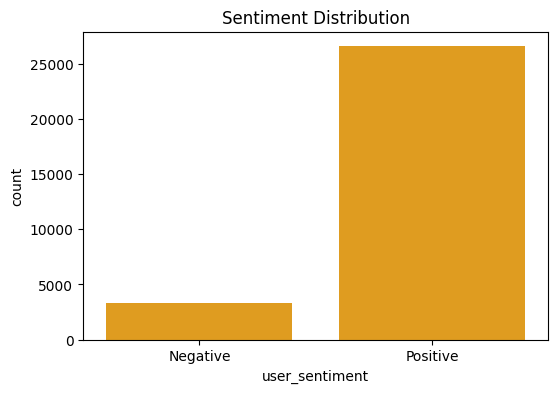

In [136]:
# Analyze the distribution of user sentiments (Target Variable)
df_clean['user_sentiment'].value_counts()

plt.figure(figsize=(6,4))
sns.countplot(x='user_sentiment', data=df_clean, color="Orange")
plt.title("Sentiment Distribution")
plt.show()

In [137]:
#Check Imbalance
df_clean['user_sentiment'].value_counts(normalize=True) * 100

user_sentiment
Positive    88.786077
Negative    11.213923
Name: proportion, dtype: float64

In [138]:
df_clean['reviews_rating'].describe()

count    29936.000000
mean         4.484099
std          0.986775
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: reviews_rating, dtype: float64

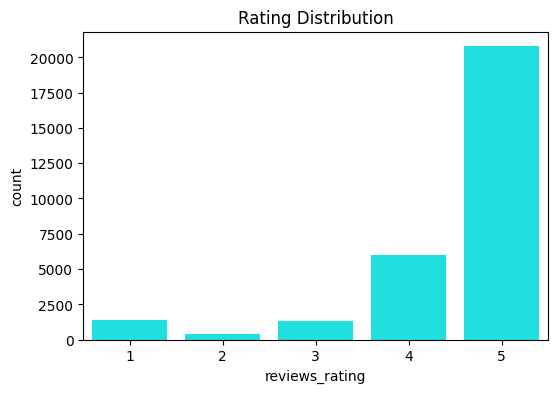

In [139]:
#Rating Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='reviews_rating', data=df_clean, color="cyan")
plt.title("Rating Distribution")
plt.show()

In [140]:
#Average rating
print("Average Rating:", df_clean['reviews_rating'].mean())

Average Rating: 4.484099412079102


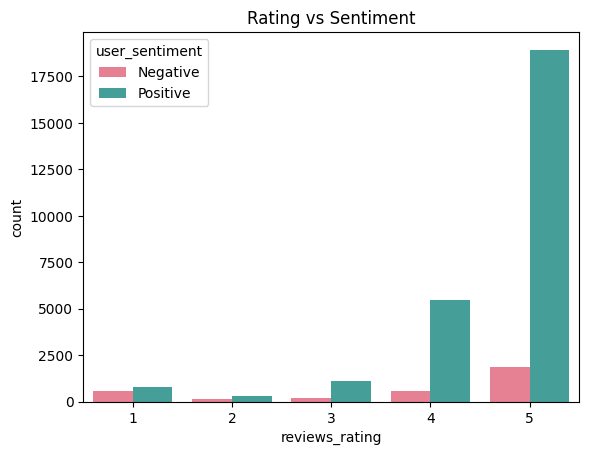

In [141]:
#Sentiment vs Rating Relationship

sns.countplot(x='reviews_rating', hue='user_sentiment', data=df_clean, palette="husl")
plt.title("Rating vs Sentiment")
plt.show()

In [142]:
# Sentiment vs Recommend
pd.crosstab(df_clean['user_sentiment'], df_clean['reviews_doRecommend'], normalize='index') * 100

reviews_doRecommend,False,True
user_sentiment,,
Negative,29.103366,70.896634
Positive,11.716016,88.283984


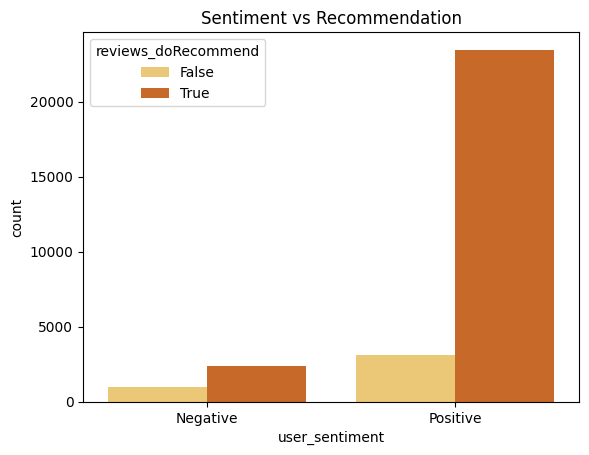

In [143]:
sns.countplot(x='user_sentiment', hue='reviews_doRecommend', data=df_clean, palette="YlOrBr")
plt.title("Sentiment vs Recommendation")
plt.show()

In [144]:
#Sentiment vs Purchase
pd.crosstab(df_clean['user_sentiment'], df_clean['reviews_didPurchase'], normalize='index') * 100

reviews_didPurchase,False,True
user_sentiment,,
Negative,93.089068,6.910932
Positive,95.477633,4.522367


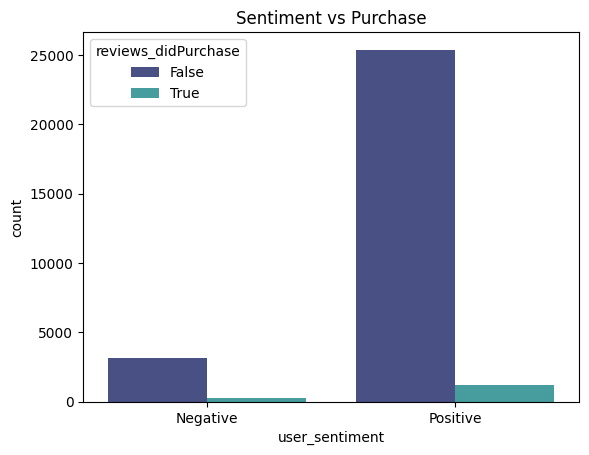

In [145]:
sns.countplot(x='user_sentiment', hue='reviews_didPurchase', data=df_clean, palette="mako")
plt.title("Sentiment vs Purchase")
plt.show()

In [146]:
#Sentiment vs Brand
pd.crosstab(df_clean['user_sentiment'], df_clean['brand'], normalize='index') * 100

brand,4C Foods,AMBI,ANCHOR BAY,Africa's Best,Alberto VO5,All-Bran,Annie's,Arrid,Aussie,Australian Gold,...,Warner Music Group,Way Basics,Weather Tech,Weleda,Wilton,Windex,Yes to Carrots,Yes to Grapefruit,Yosemite Home Decor,iStarUSA
user_sentiment,,,,,,,,,,,,,,,,,,,,,
Negative,0.029789,0.000000,0.029789,0.029789,0.029789,0.059577,0.059577,0.178731,0.208520,0.178731,...,0.625559,0.000000,0.059577,0.000000,0.000000,2.085195,0.000000,0.208520,0.029789,0.029789
Positive,0.018812,0.015049,0.109109,0.018812,0.007525,0.033861,0.026337,0.045148,0.308514,0.105346,...,0.688513,0.037624,0.037624,0.030099,0.003762,1.045939,0.237029,0.120396,0.000000,0.000000


### Averages

In [147]:
# The more average product rating, the more likely the product is liked by the users.
avg_rating_product = df_clean.groupby('name')['reviews_rating'].mean().sort_values(ascending=False)
avg_rating_product.head(15)

name
Voortman Sugar Free Fudge Chocolate Chip Cookies                                                        5.0
Bodycology Nourishing Body Cream, Pretty In Paris                                                       5.0
Walkers Stem Ginger Shortbread                                                                          5.0
Citrus Magic Instant Spot & Stain Remover                                                               5.0
Progresso Traditional Chicken Rice With Vegetables Soup                                                 5.0
RC Cola, 12oz                                                                                           5.0
Lynk Professional174 Pull Out Cutting Board Bakeware Sliding Cabinet Organizer                          5.0
J.R. Watkins Hand Cream, Lemon Cream                                                                    5.0
Lundberg Organic Cinnamon Toast Rice Cakes                                                              5.0
Ceiling Fan With Light 

In [148]:
#The more the variance, the more likely the product is controversial.
rating_var = df_clean.groupby('name')['reviews_rating'].var().sort_values(ascending=False)
rating_var.head(15)

name
Annie's Homegrown Deluxe Elbows & Four Cheese Sauce                                                        4.500000
Olivella Bar Soap - 3.52 Oz                                                                                4.333333
D-Con Mice Bait Station - 3ct                                                                              3.952381
L'oreal Paris Advanced Hairstyle TXT IT Hyper-Fix Putty                                                    3.770751
Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee    3.733333
Wagan Smartac 80watt Inverter With Usb                                                                     3.500000
Clear Scalp & Hair Therapy Total Care Nourishing Shampoo                                                   3.375596
Post Bound Jumbo Album - Burgundy (11x14)                                                                  3.357143
Neutrogena Wet Skin Sunscreen Spray Broad Spectrum SPF 50, 5oz     

In [149]:
#The more average brand rating, the more likely the brand is liked by the users.
brand_rating = df_clean.groupby('brand')['reviews_rating'].mean().sort_values(ascending=False)
brand_rating.head(15)

brand
4C Foods                          5.0
Hunter Fan                        5.0
Naturtint                         5.0
La Tortilla Factory               5.0
Jake And The Neverland Pirates    5.0
JNH Lifestyles                    5.0
J.R. Watkins                      5.0
INC International Concepts        5.0
Hortense B. Hewitt                5.0
Pacific Natural Foods             5.0
Heinz                             5.0
Happy Family                      5.0
Guardian                          5.0
Fiskars                           5.0
Every Man Jack                    5.0
Name: reviews_rating, dtype: float64

In [150]:
df_clean.columns

Index(['id', 'brand', 'categories', 'manufacturer', 'name',
       'reviews_didPurchase', 'reviews_doRecommend', 'reviews_rating',
       'reviews_text', 'reviews_title', 'reviews_username', 'user_sentiment'],
      dtype='object')

In [151]:
# User vs Average Rating
avg_rating_user = df_clean.groupby('reviews_username')['reviews_rating'].mean().sort_values(ascending=False)
avg_rating_user.head()

reviews_username
keyshs40     5.0
keebler76    5.0
keepisr      5.0
shawnna71    5.0
shawnp       5.0
Name: reviews_rating, dtype: float64

In [152]:
avg_rating_user.describe()

count    24914.000000
mean         4.518186
std          0.923069
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: reviews_rating, dtype: float64

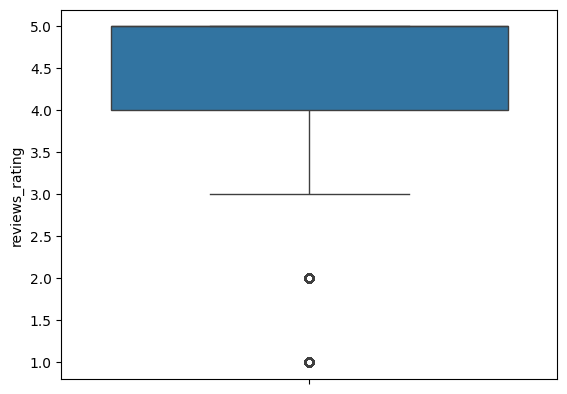

In [153]:
#Outliers in Ratings

sns.boxplot(y=df_clean['reviews_rating'])
plt.show()

# Text Processing

In [154]:
#Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\smaddims\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\smaddims\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [155]:
# Initialize stop words and lemmatizer for text preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [156]:
#Preprocessing the text 
def preprocess_text(input_text):
    # Standardize text by converting everything to lowercase
    input_text = input_text.lower()
    
    # Strip out any HTML elements
    input_text = re.sub(r'<[^>]+>', '', input_text)
    
    # Remove web links
    input_text = re.sub(r'(https?://\S+|www\.\S+)', '', input_text)
    
    # Keep only alphabetic characters and spaces
    input_text = re.sub(r'[^a-z\s]', ' ', input_text)
    
    # Break text into individual words
    words = input_text.split()
    
    # Filter out stopwords and apply lemmatization
    processed_words = [
        lemmatizer.lemmatize(token)
        for token in words
        if token not in stop_words
    ]
    
    # Reconstruct cleaned text
    return " ".join(processed_words)

In [157]:
# Generate a new column by merging reviews_title and reviews_text to provide richer contextual information for the recommendation system.
df_clean['combined_reviews'] = (df_clean['reviews_title'] + ' ' + df_clean['reviews_text']).str.strip()

# Applying the preprocessing function to the combined_reviews column
df_clean['reviews_cleaned'] = df_clean['combined_reviews'].apply(preprocess_text)
df_clean[['combined_reviews', 'reviews_cleaned']].sample(10, random_state=101)

,combined_reviews,reviews_cleaned
5549,Good series One of my favorite tv series I fin...,good series one favorite tv series finally fou...
2662,good movie Loved the first and enjoyed the sec...,good movie loved first enjoyed second see movi...
23071,Not like the last MB/American Gozilla movie. T...,like last mb american gozilla movie like ameri...
3316,still doing great music good music from a grea...,still great music good music great band album ...
5107,Best value Got this set for $15 and couldn't b...,best value got set happier would recommend fan...
15102,Extremely Useful For lawyers preparing for tri...,extremely useful lawyer preparing trial binder...
17991,Amazed! My lips were super dry this morning an...,amazed lip super dry morning applied product h...
8980,Love It! I love Clorox wipes they are so easy ...,love love clorox wipe easy use great cleaning ...
19963,I ABSOLUTELY LOVE THEM I have 3 boys all under...,absolutely love boy age typical boy way get me...
10057,AWESOME!! We have a kitty who likes to diddle ...,awesome kitty like diddle random place get did...


In [158]:
# Generate a new column to analyze the length of reviews and its relationship with sentiment.

df_clean['review_length'] = df_clean['reviews_text'].apply(lambda x: len(x.split()))
df_clean[['reviews_text', 'review_length']].sample(10, random_state=101)

,reviews_text,review_length
5549,One of my favorite tv series I finally found o...,17
2662,Loved the first and enjoyed the second. Didn't...,19
23071,This is more like an Americanized Japanese ver...,38
3316,good music from a great band! album #2 is stil...,13
5107,Got this set for $15 and couldn't be happier. ...,17
15102,For lawyers preparing for trial - binders that...,38
17991,My lips were super dry this morning and I appl...,53
8980,I love Clorox wipes they are so easy to use an...,31
19963,I have 3 boys all under the age of 7. They are...,42
10057,We have a kitty who likes to diddle in random ...,23


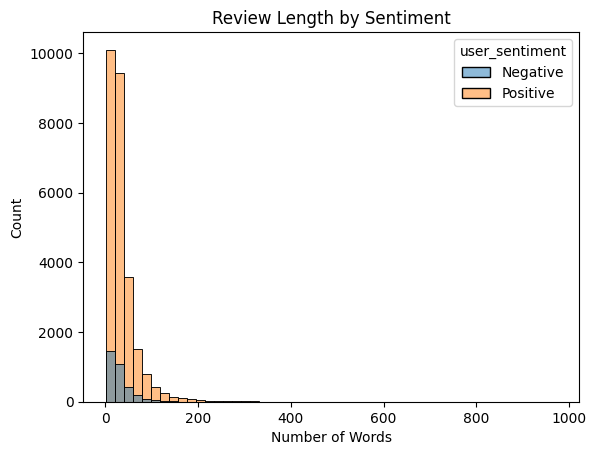

In [159]:
# Analyze the distribution of review lengths by sentiment
plt.figure()
sns.histplot(data=df_clean, x='review_length', hue='user_sentiment', bins=50)
plt.title("Review Length by Sentiment")
plt.xlabel("Number of Words")
plt.ylabel("Count")
plt.show()

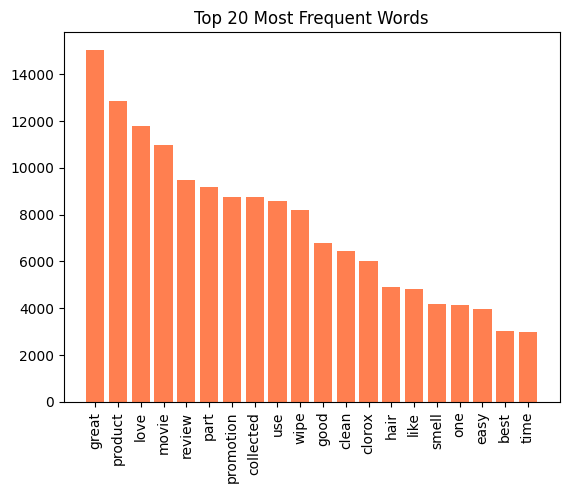

In [160]:
# Analyze the most common 20 words in the cleaned reviews to understand common themes and sentiments expressed by users.
from collections import Counter

all_words = " ".join(df_clean['reviews_cleaned']).split()
word_freq = Counter(all_words)

common_words = word_freq.most_common(20)

words = [w[0] for w in common_words]
counts = [w[1] for w in common_words]

plt.figure()
plt.bar(words, counts, color="coral")
plt.xticks(rotation=90)
plt.title("Top 20 Most Frequent Words")
plt.show()

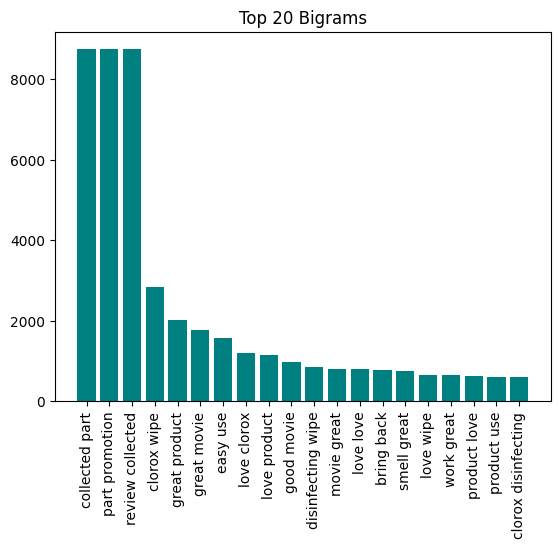

In [161]:
# Analyze the most common bigrams in the cleaned reviews.
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(2,2), max_features=20)
bigrams_data = vectorizer.fit_transform(df_clean['reviews_cleaned'])

bigram_counts = bigrams_data.sum(axis=0).A1
bigrams = vectorizer.get_feature_names_out()

bigram_freq = list(zip(bigrams, bigram_counts))
bigram_freq = sorted(bigram_freq, key=lambda x: x[1], reverse=True)

bigram_words = [b[0] for b in bigram_freq]
bigram_values = [b[1] for b in bigram_freq]

plt.figure()
plt.bar(bigram_words, bigram_values, color="teal")
plt.xticks(rotation=90)
plt.title("Top 20 Bigrams")
plt.show()

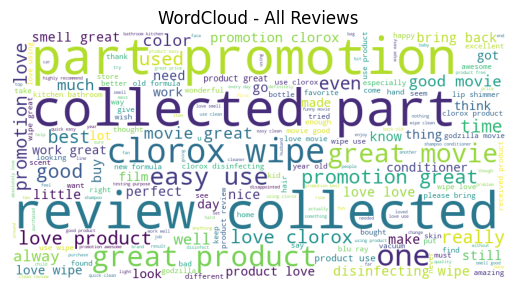

In [162]:
# generate a word cloud to visualize the most common words in the reviews and their prominence in the dataset.
import wordcloud
from wordcloud import WordCloud

text = " ".join(df_clean['reviews_cleaned'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure()
plt.imshow(wordcloud, cmap='viridis')
plt.axis("off")
plt.title("WordCloud - All Reviews")
plt.show()

# Feature Extraction

In [163]:
# Prepare the data for model building by defining the feature matrix X and target vector y.
X = df_clean['reviews_cleaned']
y = df_clean['user_sentiment']

In [164]:
# Create the test-train split
#Apply stratified sampling to preserve the distribution of the target variable across both the training and testing sets. 
# This approach is essential because the dataset is imbalanced.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [165]:
# Checking the training and testing set size after split
print("Training Variables Shape:", X_train.shape, y_train.shape)
print("Testing Variables Shape:", X_test.shape, y_test.shape)

Training Variables Shape: (23948,) (23948,)
Testing Variables Shape: (5988,) (5988,)


In [166]:
#The data samples are split by maintaining the same distribution of the target variable in both training and testing sets.

print("Training set class distribution:")
print(y_train.value_counts(normalize=True) * 100)

print("\nTesting set class distribution:")
print(y_test.value_counts(normalize=True) * 100)

Training set class distribution:
user_sentiment
Positive    88.784032
Negative    11.215968
Name: proportion, dtype: float64

Testing set class distribution:
user_sentiment
Positive    88.794255
Negative    11.205745
Name: proportion, dtype: float64


In [167]:
#Create vectorizer
# Use unigrams and bigrams to capture more context from the reviews as the dataset is of 30k rows 
# If  larger dataset trigrams would've been used -> trigrams may lead to sparsity and overfitting.

vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

print("Vectorization complete. Feature matrix shapes:")
print("X_train_vectorized shape:", X_train_vectorized.shape)
print("X_test_vectorized shape:", X_test_vectorized.shape)

Vectorization complete. Feature matrix shapes:
X_train_vectorized shape: (23948, 5000)
X_test_vectorized shape: (5988, 5000)


# Model Building

### 'user_sentiment' Class Imbalance

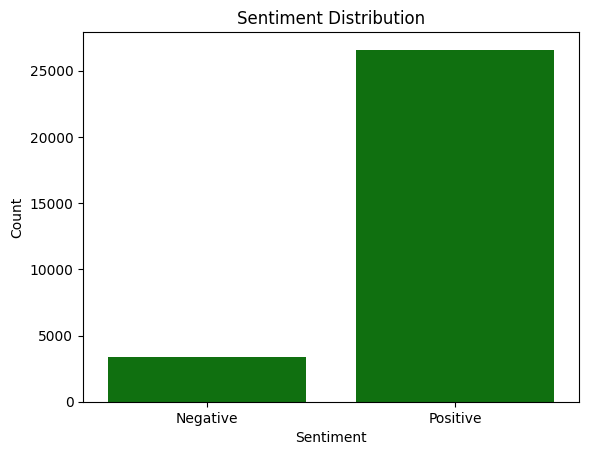

In [168]:


y.value_counts(normalize=True)

sns.countplot(x=y, color="green")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

### Building 3 Models

Evaluation metrics to be used for each model
- Confusion matrix
- ROC-AUC Score
- Precision
- Recall
- F1-score

#### Logistic Regression

In [169]:
# The dataset is imbalanced, with a higher proportion of positive sentiments compared to negative sentiments.
# To address this, we use the 'balanced' class weight in the Logistic Regression model.

#The max_iter is set to 1000 to ensure that the model converges during training, 
# especially given the complexity of the text data and the potential for a large feature space after vectorization.

#random_state is set to 42 for reproducibility, 
# ensuring that the results can be consistently replicated across different runs.

# Build and evaluate the Logistic Regression model to classify user sentiments based on the cleaned reviews.


logiReg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

logiReg.fit(X_train_vectorized, y_train)
y_pred_logiReg = logiReg.predict(X_test_vectorized)

print("Classification Report:\n", classification_report(y_test, y_pred_logiReg))

Classification Report:
               precision    recall  f1-score   support

    Negative       0.44      0.84      0.57       671
    Positive       0.98      0.86      0.92      5317

    accuracy                           0.86      5988
   macro avg       0.71      0.85      0.75      5988
weighted avg       0.92      0.86      0.88      5988



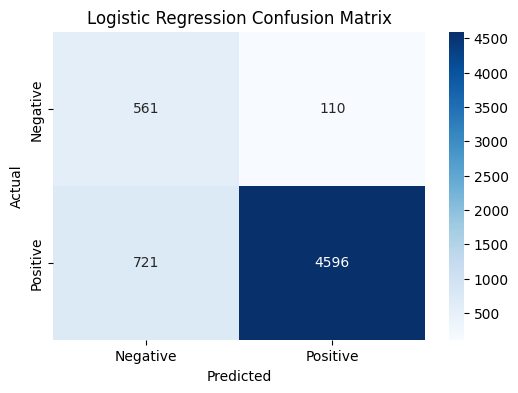

In [170]:
#Visualize the confusion matrix for Logistic Regression
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_logiReg)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=logiReg.classes_, yticklabels=logiReg.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

ROC AUC Score for Logistic Regression: 0.9277


Text(0.5, 1.0, 'ROC Curve')

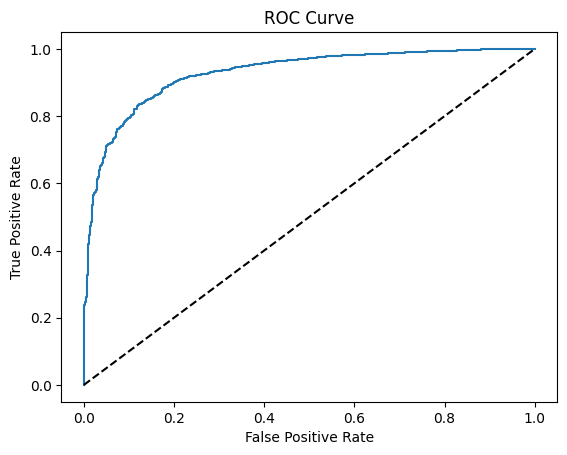

In [171]:
#ROC AUC Score for Logistic Regression
from sklearn.metrics import roc_auc_score
y_prob_logiReg = logiReg.predict_proba(X_test_vectorized)[:, 1]  # Probability of the positive class
roc_auc_logiReg = roc_auc_score(y_test.cat.codes, y_prob_logiReg)
print(f"ROC AUC Score for Logistic Regression: {roc_auc_logiReg:.4f}")

#Plot ROC Curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test.cat.codes, y_prob_logiReg)
plt.figure()
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc_logiReg:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

#### Multinomial Naive Bayes

In [172]:
#Using Multinomial Naive Bayes for text classification, 
# as it is well-suited for handling the high-dimensional feature space created by the TF-IDF vectorization of the reviews.

#Build and evaluate the Multinomial Naive Bayes model to classify user sentiments based on the cleaned reviews.

navieBayes = MultinomialNB()

navieBayes.fit(X_train_vectorized, y_train)
y_pred_navieBayes = navieBayes.predict(X_test_vectorized)

print("Classification Report:\n", classification_report(y_test, y_pred_navieBayes))

Classification Report:
               precision    recall  f1-score   support

    Negative       0.50      0.13      0.21       671
    Positive       0.90      0.98      0.94      5317

    accuracy                           0.89      5988
   macro avg       0.70      0.56      0.57      5988
weighted avg       0.86      0.89      0.86      5988



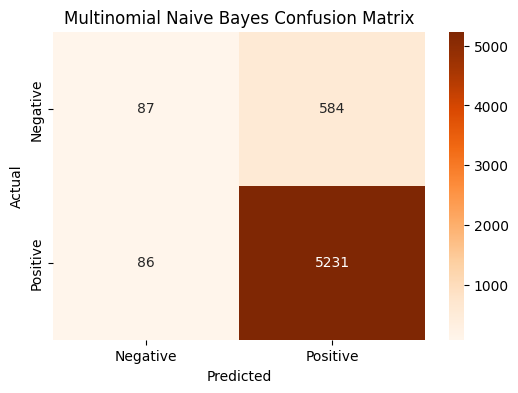

In [173]:
#Visualize the confusion matrix for Multinomial Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_navieBayes)
plt.figure(figsize=(6,4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Oranges', xticklabels=navieBayes.classes_, yticklabels=navieBayes.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Multinomial Naive Bayes Confusion Matrix")
plt.show()

ROC AUC Score for Multinomial Naive Bayes: 0.8373


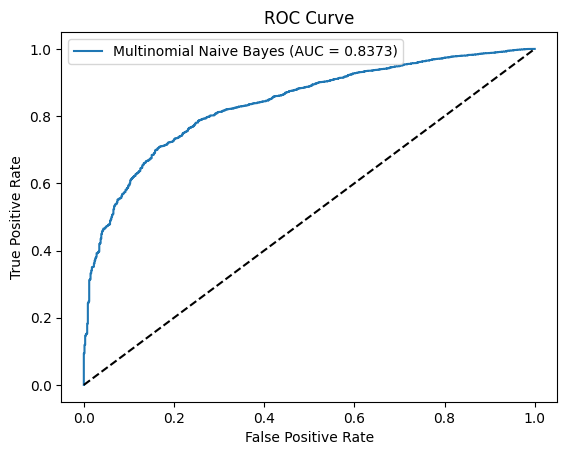

In [174]:
#ROC Curve and AUC Score for Multinomial Naive Bayes
y_prob_nb = navieBayes.predict_proba(X_test_vectorized)[:, 1]  # Probability of the positive class
roc_auc_nb = roc_auc_score(y_test.cat.codes, y_prob_nb)
print(f"ROC AUC Score for Multinomial Naive Bayes: {roc_auc_nb:.4f}")

#Plot ROC Curve for Multinomial Naive Bayes
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test.cat.codes, y_prob_nb)
plt.figure()
plt.plot(fpr_nb, tpr_nb, label=f'Multinomial Naive Bayes (AUC = {roc_auc_nb:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

#### Random Forest

In [175]:
#n_estimators - The number of trees in the forest. A higher number of trees can improve performance but also increases computational cost.

#class_weight='balanced' - This parameter helps to address the class imbalance in the dataset 
# by assigning weights to classes inversely proportional to their frequencies.

#random_state is set to 42 for reproducibility, ensuring that the results can be consistently replicated across different runs.

#n_jobs=-1 allows the model to utilize all available CPU cores for faster training.

#Build and evaluate the Random Forest model to classify user sentiments based on the cleaned reviews.

randomForest = RandomForestClassifier(
    n_estimators=200,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

randomForest.fit(X_train_vectorized, y_train)
y_pred_randomForest = randomForest.predict(X_test_vectorized)

print("Classification Report:\n", classification_report(y_test, y_pred_randomForest))

Classification Report:
               precision    recall  f1-score   support

    Negative       0.88      0.42      0.56       671
    Positive       0.93      0.99      0.96      5317

    accuracy                           0.93      5988
   macro avg       0.90      0.70      0.76      5988
weighted avg       0.92      0.93      0.92      5988



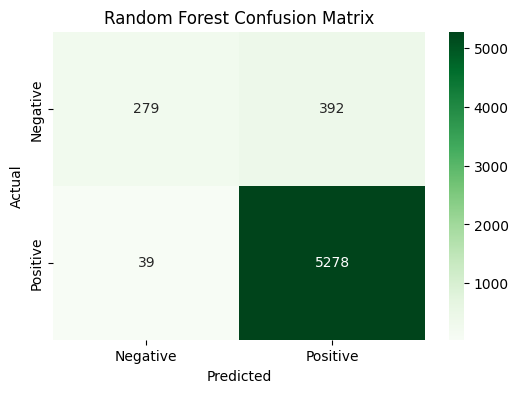

In [176]:
#Visualize the confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_randomForest)
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', xticklabels=randomForest.classes_, yticklabels=randomForest.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()

ROC AUC Score for Random Forest: 0.9257


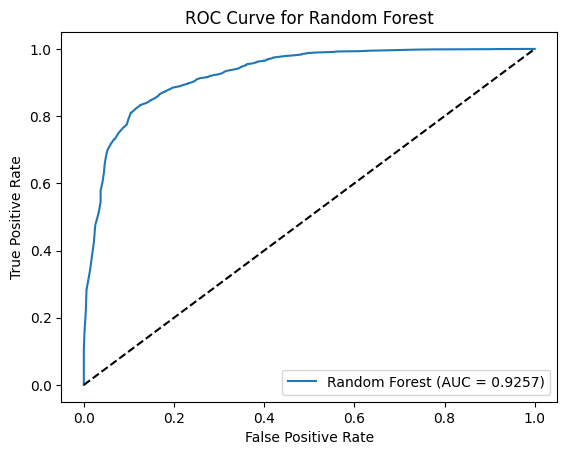

In [177]:
#ROC AUC Score for Random Forest
y_prob_rf = randomForest.predict_proba(X_test_vectorized)[:, 1]  # Probability of the positive class
roc_auc_rf = roc_auc_score(y_test.cat.codes, y_prob_rf)
print(f"ROC AUC Score for Random Forest: {roc_auc_rf:.4f}")

#Plot ROC Curve for Random Forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test.cat.codes, y_prob_rf)
plt.figure()
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc='lower right')
plt.show()

#### Model Comparsion

In [178]:
#Comparing the 3 Models Precision, Recall, F1-Score, ROC AUC Score

models = ['Logistic Regression', 'Multinomial Naive Bayes', 'Random Forest']
# Calculate metrics for each model

# Precision - TP/TP+FP
#average='weighted' is used to calculate the precision for each class and then take the average,weighted by the number of true instances for each class. This is important in imbalanced datasets.
precision = [
    precision_score(y_test, y_pred_logiReg, average='weighted'),
    precision_score(y_test, y_pred_navieBayes, average='weighted'),
    precision_score(y_test, y_pred_randomForest, average='weighted')
]

# Recall - TP/TP+FN
#average='weighted' is used to calculate the recall for each class and then take the average,weighted by the number of true instances for each class. This is important in imbalanced datasets.
recall = [
    recall_score(y_test, y_pred_logiReg, average='weighted'),
    recall_score(y_test, y_pred_navieBayes, average='weighted'),
    recall_score(y_test, y_pred_randomForest, average='weighted')
]

# F1-Score - 2*(Precision*Recall)/(Precision+Recall) 
f1_score = [
    f1_score(y_test, y_pred_logiReg, average='weighted'),
    f1_score(y_test, y_pred_navieBayes, average='weighted'),
    f1_score(y_test, y_pred_randomForest, average='weighted')
]
# ROC AUC Score - Area under the ROC curve
roc_auc = [roc_auc_logiReg, roc_auc_nb, roc_auc_rf]

# Create a DataFrame to compare the models
metrics_df = pd.DataFrame({
    'Model': models,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1_score,
    'ROC AUC Score': roc_auc
})

metrics_df

,Model,Precision,Recall,F1-Score,ROC AUC Score
0,Logistic Regression,0.916223,0.861222,0.878701,0.927710
1,Multinomial Naive Bayes,0.855119,0.888110,0.857602,0.837269
2,Random Forest,0.924868,0.928023,0.916334,0.925676


#### Model Selection & Reasoning

Selected Model - **Logistic Regression**

AlLogistic Regression turned out to be the most suitable model overall. It achieved the highest ROC-AUC score and maintained a good balance between precision (0.917) and recall (0.861), resulting in a solid F1-score of 0.878.

Multinomial Naive Bayes showed the weakest performance among the models tested.

Random Forest performed comparatively well, especially in terms of F1-score due to strong precision and recall values. However, its ROC-AUC score was slightly lower than Logistic Regression.

From a practical standpoint, model selection is not just about performance metrics but also about real-time usability. Random Forest is computationally heavier because it builds multiple decision trees, making it more time- and space-intensive. This can affect scalability when handling a large number of real-time requests. Larger models are also more complex to deploy and maintain.

On the other hand, Logistic Regression offers faster inference, lower complexity, a smaller model size, and easier deployment.

Considering the minimal differences:

ROC-AUC: 0.928 vs 0.924 (only a 0.4% difference)

F1-Score: 0.878 vs 0.917 (a 3.9% difference)

The performance gap is small, while Logistic Regression provides better efficiency and scalability. Therefore, it is a practical and reliable choice for the recommender system.

# Building a Recommendation System

### Test Train Split of Data for Recommender System

In [179]:
def train_test_split_cf(dataframe):
    train_data_parts = []
    test_data_parts = []

    for username in dataframe['reviews_username'].unique():
        user_records = dataframe[dataframe['reviews_username'] == username]

        if len(user_records) < 2:
            train_data_parts.append(user_records)
            continue

        user_train, user_test = train_test_split(
            user_records,
            test_size=0.2,
            random_state=42
        )

        train_data_parts.append(user_train)
        test_data_parts.append(user_test)

    train_set = pd.concat(train_data_parts)
    test_set = pd.concat(test_data_parts)

    return train_set, test_set


In [180]:
ratings_df = df_clean[['reviews_username', 'name', 'reviews_rating']]

user_item_table = ratings_df.pivot_table(
    index='reviews_username',
    columns='name',
    values='reviews_rating'
)
print("User-Item Table Shape:", user_item_table.shape)

User-Item Table Shape: (24914, 271)


In [181]:
ratings_train_df, ratings_test_df = train_test_split_cf(ratings_df)

train_table = ratings_train_df.pivot_table(
    index='reviews_username',
    columns='name',
    values='reviews_rating'
)

test_table = ratings_test_df.pivot_table(
    index='reviews_username',
    columns='name',
    values='reviews_rating'
)

print("Training matrix shape:", train_table.shape)
print("Testing matrix shape:", test_table.shape)

Training matrix shape: (24914, 267)
Testing matrix shape: (3609, 142)


### User Based Recommender System

In user-based collaborative filtering, cosine similarity is calculated across the rows of the user–item matrix. Because each row corresponds to an individual user, the resulting similarity matrix captures how similar users are to one another. As a result, both the row indices and the column headers of the similarity matrix represent users.

This matrix is then used to identify the most similar users (neighbors), whose preferences help generate rating predictions for a target user.

In [182]:
user_cosine_similarity = cosine_similarity(train_table.fillna(0))

user_cosine_similarity_df = pd.DataFrame(
    user_cosine_similarity,
    index=train_table.index,
    columns=train_table.index
)

user_predictions = user_cosine_similarity_df.dot(train_table.fillna(0)) / np.abs(user_cosine_similarity_df).sum(axis=1).values.reshape(-1,1)
user_predictions.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),...,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.129642,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
00sab00,0.0,0.005544,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.010400,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.002171,0.000000,0.001214
01impala,0.0,0.004796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004876,...,0.0,0.0,0.000753,0.0,0.0,0.0,0.0,0.005434,0.000605,0.001282
02dakota,0.0,0.004796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004876,...,0.0,0.0,0.000753,0.0,0.0,0.0,0.0,0.005434,0.000605,0.001282
02deuce,0.0,0.004796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004876,...,0.0,0.0,0.000753,0.0,0.0,0.0,0.0,0.005434,0.000605,0.001282


### Item Based Recommender System

Cosine similarity was applied to the transposed user–item matrix to evaluate relationships between items. In the transposed structure, each row reflects a product’s rating distribution across all users. The resulting matrix therefore represents item-to-item similarity scores.

This enables the system to recommend products that are closely related to those a user has already interacted with or rated highly. Such an approach is particularly effective when users tend to show consistent preferences across similar types of products.

In [183]:
item_cosine_similarity = cosine_similarity(train_table.fillna(0).T)

item_cosine_similarity_df = pd.DataFrame(
    item_cosine_similarity,
    index=train_table.columns,
    columns=train_table.columns
)

item_predictions = train_table.fillna(0).dot(item_cosine_similarity_df) / np.abs(item_cosine_similarity_df).sum(axis=1)
item_predictions.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),...,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.057628,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
00sab00,0.0,0.005253,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009298,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.001665,0.000000,0.001598
01impala,0.0,0.023010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022525,...,0.0,0.0,0.022187,0.0,0.0,0.0,0.0,0.017044,0.004930,0.010711
02dakota,0.0,0.038350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.037541,...,0.0,0.0,0.036978,0.0,0.0,0.0,0.0,0.028406,0.008216,0.017851
02deuce,0.0,0.030680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.030033,...,0.0,0.0,0.029582,0.0,0.0,0.0,0.0,0.022725,0.006573,0.014281


### Recommender System Evaluation

In [184]:
# Compute Precision@K for the user-based collaborative filtering model
def precision_at_k(pred_matrix, test_matrix, k=5, threshold=4):

    precisions = []

    for user in test_matrix.index:

        if user not in pred_matrix.index:
            continue

        actual_items = test_matrix.loc[user]
        relevant_items = actual_items[actual_items >= threshold].index

        if len(relevant_items) == 0:
            continue

        predicted_scores = pred_matrix.loc[user].sort_values(ascending=False)
        top_k_items = predicted_scores.head(k).index

        hits = len(set(top_k_items).intersection(set(relevant_items)))
        precisions.append(hits / k)

    return np.mean(precisions)

In [185]:
# Compute Recall@K for the user-based collaborative filtering model
def recall_at_k(pred_matrix, test_matrix, k=5, threshold=4):

    recalls = []

    for user in test_matrix.index:

        if user not in pred_matrix.index:
            continue

        actual_items = test_matrix.loc[user]
        relevant_items = actual_items[actual_items >= threshold].index

        if len(relevant_items) == 0:
            continue

        predicted_scores = pred_matrix.loc[user].sort_values(ascending=False)
        top_k_items = predicted_scores.head(k).index

        hits = len(set(top_k_items).intersection(set(relevant_items)))
        recalls.append(hits / len(relevant_items))

    return np.mean(recalls)

In [186]:
# Compute RMSE, MAE for user-based collaborative filtering
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

def compute_scores(predictions, actuals):

    # Find overlapping users and items
    shared_users = actuals.index.intersection(predictions.index)
    shared_items = actuals.columns.intersection(predictions.columns)

    true_values = []
    predicted_values = []   

    for u in shared_users:
        for i in shared_items:
            if not np.isnan(actuals.loc[u, i]):
                true_values.append(actuals.loc[u, i])
                predicted_values.append(predictions.loc[u, i])

    return np.sqrt(mean_squared_error(true_values, predicted_values, squared=False)), mean_absolute_error(true_values, predicted_values)

In [187]:
# Compute NDCG@K for the user-based collaborative filtering model

def dcg_at_k(relevances, k):
    return sum(rel / np.log2(idx + 2) for idx, rel in enumerate(relevances[:k]))


def ndcg_at_k(pred_matrix, test_matrix, k=5, threshold=4):

    ndcgs = []

    for user in test_matrix.index:

        if user not in pred_matrix.index:
            continue

        actual_items = test_matrix.loc[user]
        relevant_items = actual_items[actual_items >= threshold]

        if len(relevant_items) == 0:
            continue

        predicted_scores = pred_matrix.loc[user].sort_values(ascending=False)
        top_k_items = predicted_scores.head(k).index

        relevances = [
            1 if item in relevant_items.index else 0
            for item in top_k_items
        ]

        dcg = dcg_at_k(relevances, k)
        ideal_relevances = sorted(relevances, reverse=True)
        idcg = dcg_at_k(ideal_relevances, k)

        ndcgs.append(dcg / idcg if idcg > 0 else 0)

    return np.mean(ndcgs)

In [188]:
# RMSE & MAE for - for rating predictions of user-based collaborative filtering
# Precision@K, Recall@K - for Top-K Recommendations rating predictions of user-based collaborative filtering
# NDCG@K - for ranking quality of Top-K Recommendations of user-based collaborative filtering

rmse_user, mae_user = compute_scores(user_predictions, test_table)
precision_k_user = precision_at_k(user_predictions, test_table, k=5)
recall_k_user = recall_at_k(user_predictions, test_table, k=5)
ndcg_k_user = ndcg_at_k(user_predictions, test_table, k=5)

In [189]:
# RMSE & MAE for - for rating predictions of item-based collaborative filtering
# Precision@K, Recall@K - for Top-K Recommendations rating predictions of item-based collaborative filtering
# NDCG@K - for ranking quality of Top-K Recommendations of item-based collaborative filtering

rmse_item, mae_item = compute_scores(item_predictions, test_table)
precision_k_item = precision_at_k(item_predictions, test_table, k=5)
recall_k_item = recall_at_k(item_predictions, test_table, k=5)
ndcg_k_item = ndcg_at_k(item_predictions, test_table, k=5)

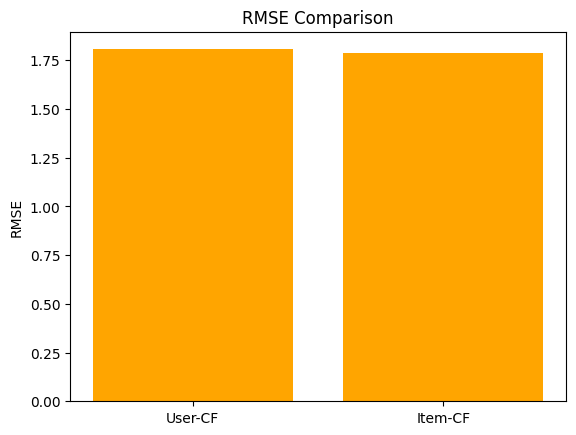

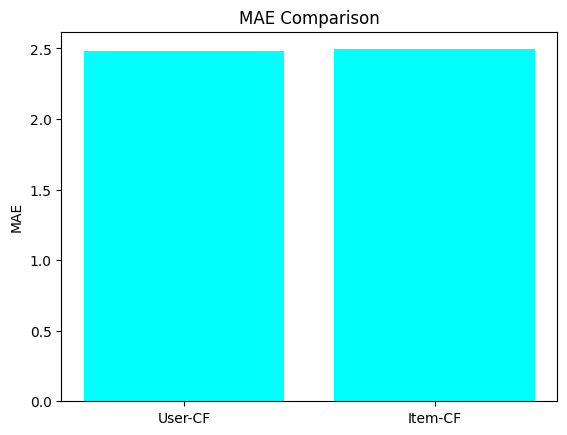

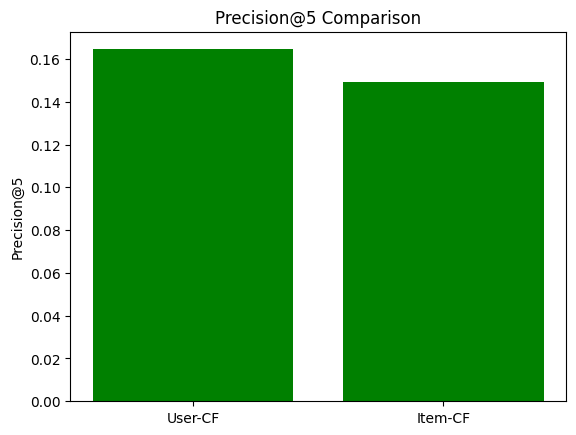

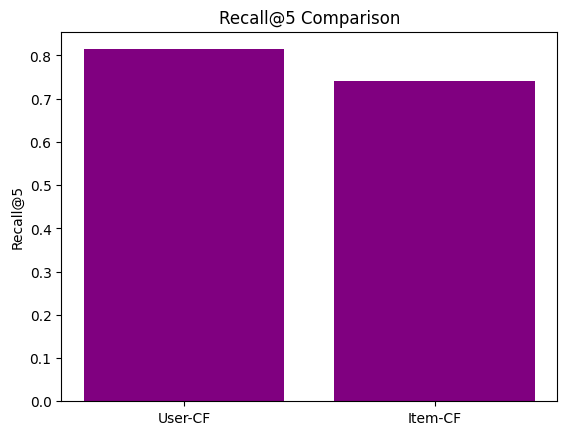

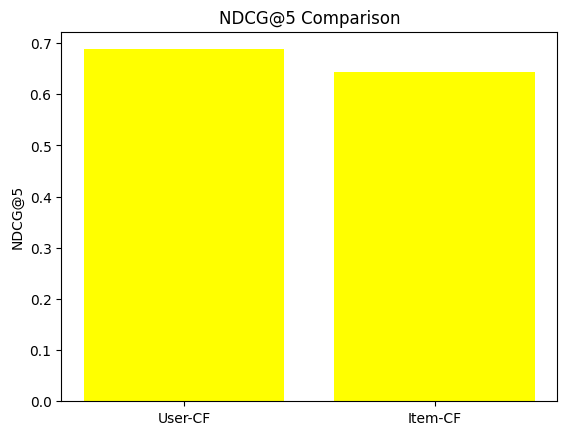

In [190]:
# Plotting the evaluation metrics for the user-based collaborative filtering model to decide which model performs better in terms of rating prediction accuracy and recommendation quality.

# Metric names
metric_labels = ["RMSE", "MAE", "Precision@5", "Recall@5", "NDCG@5"]

# User-based scores
user_scores = [
    rmse_user,      # RMSE
    mae_user,      # MAE
    precision_k_user,
    recall_k_user,
    ndcg_k_user
]

# Item-based scores
item_scores = [
    rmse_item,
    mae_item,
    precision_k_item,
    recall_k_item,
    ndcg_k_item
]


# -------- Plot 1: RMSE --------
plt.figure()
plt.bar(["User-CF", "Item-CF"], [user_scores[0], item_scores[0]], color =["orange"])
plt.title("RMSE Comparison")
plt.ylabel("RMSE")
plt.show()


# -------- Plot 2: MAE --------
plt.figure()
plt.bar(["User-CF", "Item-CF"], [user_scores[1], item_scores[1]], color =["cyan"])
plt.title("MAE Comparison")
plt.ylabel("MAE")
plt.show()


# -------- Plot 3: Precision@5 --------
plt.figure()
plt.bar(["User-CF", "Item-CF"], [user_scores[2], item_scores[2]], color =["green"])
plt.title("Precision@5 Comparison")
plt.ylabel("Precision@5")
plt.show()


# -------- Plot 4: Recall@5 --------
plt.figure()
plt.bar(["User-CF", "Item-CF"], [user_scores[3], item_scores[3]], color =["purple"])
plt.title("Recall@5 Comparison")
plt.ylabel("Recall@5")
plt.show()


# -------- Plot 5: NDCG@5 --------
plt.figure()
plt.bar(["User-CF", "Item-CF"], [user_scores[4], item_scores[4]], color =["yellow"])
plt.title("NDCG@5 Comparison")
plt.ylabel("NDCG@5")
plt.show()

In [191]:
# Create comparison table
comparison_table = pd.DataFrame({
    "Metric": ["RMSE", "MAE", "Precision@5", "Recall@5", "NDCG@5"],
    "User-Based CF": [
        rmse_user,
        mae_user,
        precision_k_user,
        recall_k_user,
        ndcg_k_user
    ],
    "Item-Based CF": [
        rmse_item,
        mae_item,
        precision_k_item,
        recall_k_item,
        ndcg_k_item
    ]
})

comparison_table

,Metric,User-Based CF,Item-Based CF
0,RMSE,1.806273,1.789225
1,MAE,2.483835,2.493885
2,Precision@5,0.164507,0.149137
3,Recall@5,0.814284,0.741289
4,NDCG@5,0.687725,0.643127


Chosen Recommender System - **Item Based Recommender System**

Both user-based and item-based collaborative filtering approaches were assessed using error and ranking metrics. For rating prediction, the item-based model produced a slightly lower RMSE (1.789) compared to the user-based model (1.806), indicating a marginal improvement in predictive accuracy. The MAE values are also very close, showing that both models perform almost similarly in terms of absolute error.

In contrast, when evaluating top-K recommendation quality, the user-based method achieved higher Precision@5, Recall@5, and NDCG@5 scores. This means it was somewhat better at placing relevant items within the top recommendations.

Although user-based filtering performs better on ranking metrics, the differences between the two models are not very large overall. From a system design perspective, item-based collaborative filtering is generally more stable and scalable because relationships between items tend to change less frequently than user preferences.

Taking into account its slightly better RMSE and its practical advantages in scalability and maintenance, the item-based collaborative filtering model was chosen as the final recommendation technique.

Further improvements could include applying rating normalization, incorporating regularization, or experimenting with model-based methods such as matrix factorization to enhance both accuracy and ranking performance.

# Recommendation of Top 20 Products to a Specified User

The finalized item-based collaborative filtering model was used to generate the top 20 recommendations. Predicted scores were calculated using item similarity, and items already rated by the user were removed. The remaining unseen items were ranked by predicted rating, and the top 20 were recommended.

In [192]:
# Top 20recommendations for a specific user based on item-item collaborative filtering predictions.
def get_top20_recommendations(username, train_matrix, item_prediction, n_recs=20):
    """
    Returns top-N recommended products for a specific user
    based on item-item collaborative filtering predictions.
    """

    # Check whether the user exists
    if username not in train_matrix.index:
        return f"No data available for user '{username}'."

    # Identify products the user has already interacted with
    rated_products = train_matrix.loc[username].dropna().index

    # Fetch predicted scores for that user
    predicted_scores = item_prediction.loc[username]

    # Exclude products that are already rated
    candidate_scores = predicted_scores.drop(rated_products)

    # Rank remaining products and select top-N
    recommendations = candidate_scores.sort_values(ascending=False).head(n_recs)

    return recommendations

In [193]:
# Adding a function to return the top 20 recommended product names for a given user based on item-item collaborative filtering predictions.
def recommend_top_20_items(username, train_matrix, item_prediction, top_n=20):
    recommendation = get_top20_recommendations(username, train_matrix, item_prediction, top_n)

    if isinstance(recommendation, str):
        return recommendation       

    return recommendation

In [194]:
# Select a random user from the training set to get top 20 recommendations based on item-item collaborative filtering predictions.

sample = train_table.index[150]

top_20_recommendations = recommend_top_20_items(
    sample,
    train_table,
    item_predictions,
    top_n=20
)

top_20_recommendations

name
Feit 60-Watt A19 Gu24 Base Led Light Bulb - Soft White                                 0.062571
Dark Shadows (includes Digital Copy) (ultraviolet) (dvdvideo)                          0.020253
Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo)                           0.019710
Jason Aldean - They Don't Know                                                         0.018204
Hormel Chili, No Beans                                                                 0.017995
Windex Original Glass Cleaner Refill 67.6oz (2 Liter)                                  0.016500
Mike Dave Need Wedding Dates (dvd + Digital)                                           0.014855
The Resident Evil Collection 5 Discs (blu-Ray)                                         0.008556
Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)                    0.006349
Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd                        0.006109
There's Something About Mary (dvd) 

# Fine-Tuning the Recommendation System and Recommendation of Top 5 Products

In [195]:
def calculate_positive_review_ratio(product, dataset, vectorizer, classifier):
    """
    Returns the proportion of positive reviews for a given product.
    """

    # Select reviews corresponding to the product
    product_data = dataset[dataset['name'] == product]

    if product_data.empty:
        return 0

    # Convert review text into feature vectors
    transformed_reviews = vectorizer.transform(product_data['combined_reviews'])

    # Generate sentiment predictions
    sentiment_outputs = classifier.predict(transformed_reviews)

    # Calculate fraction of positive predictions
    positive_fraction = (sentiment_outputs == 'Positive').mean()

    return positive_fraction

In [196]:
def reorder_top20recommendations_by_sentiment(recommended_items, dataset, vectorizer, classifier, k=5):

    # Validate input type
    if not isinstance(recommended_items, pd.Series):
        return "Invalid recommendation list provided."

    sentiment_dict = {}

    # Compute sentiment score for each recommended product
    for item in recommended_items.index:
        score = calculate_positive_review_ratio(
            item,
            dataset,
            vectorizer,
            classifier
        )
        sentiment_dict[item] = score

    # Rank products by positive sentiment and select top-k
    ranked_by_sentiment = (
        pd.Series(sentiment_dict)
        .sort_values(ascending=False)
        .head(k)
    )

    return ranked_by_sentiment

In [197]:
top_5_final = reorder_top20recommendations_by_sentiment(
    top_20_recommendations,
    df_clean,
    vectorizer,
    logiReg
)

print("Top 5 recommendations for user:", sample)
top_5_final

Top 5 recommendations for user: 3card


Pacific Natural Foods Organic Beef Broth                               1.000000
Pantene Pro-V Expert Collection Age Defy Conditioner                   0.948529
Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo)           0.908602
Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)    0.898424
Pantene Color Preserve Volume Shampoo, 25.4oz                          0.888889
dtype: float64

In [198]:
#Let's cmpare top 20 recommendations before and after reordering based on sentiment analysis to see how the sentiment-based re-ranking has influenced the final recommendations.

top_20_final = reorder_top20recommendations_by_sentiment(
    top_20_recommendations,
    df_clean,
    vectorizer,
    logiReg,
    20
)

before_df = top_20_recommendations.reset_index()
before_df.columns = ["Product (Before)", "Predicted Rating"]

after_df = top_20_final.reset_index()
after_df.columns = ["Product (After)", "Positive Sentiment Score"]

# Combine side-by-side
comparison_df = pd.concat([before_df, after_df], axis=1)

comparison_df


,Product (Before),Predicted Rating,Product (After),Positive Sentiment Score
0,Feit 60-Watt A19 Gu24 Base Led Light Bulb - So...,0.062571,Pacific Natural Foods Organic Beef Broth,1.000000
1,Dark Shadows (includes Digital Copy) (ultravio...,0.020253,Pantene Pro-V Expert Collection Age Defy Condi...,0.948529
2,Stargate (ws) (ultimate Edition) (director's C...,0.019710,Stargate (ws) (ultimate Edition) (director's C...,0.908602
3,Jason Aldean - They Don't Know,0.018204,Planes: Fire Rescue (2 Discs) (includes Digita...,0.898424
4,"Hormel Chili, No Beans",0.017995,"Pantene Color Preserve Volume Shampoo, 25.4oz",0.888889
5,Windex Original Glass Cleaner Refill 67.6oz (2...,0.016500,Godzilla 3d Includes Digital Copy Ultraviolet ...,0.853233
6,Mike Dave Need Wedding Dates (dvd + Digital),0.014855,There's Something About Mary (dvd),0.823077
7,The Resident Evil Collection 5 Discs (blu-Ray),0.008556,Dark Shadows (includes Digital Copy) (ultravio...,0.817814
8,Planes: Fire Rescue (2 Discs) (includes Digita...,0.006349,Jason Aldean - They Don't Know,0.774510
9,Godzilla 3d Includes Digital Copy Ultraviolet ...,0.006109,Mike Dave Need Wedding Dates (dvd + Digital),0.738441


# Deployment Using Flask

In [199]:
#Saving all the required models, vectorizers, and dataframes for use in deployment using pickle instead of joblib for better compatibility.

import pickle

# Save the trained models
with open('logistic_regression_model.pkl', 'wb') as f:
    pickle.dump(logiReg, f)

with open('multinomial_nb_model.pkl', 'wb') as f:
    pickle.dump(navieBayes, f)

with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(randomForest, f)

# Save the vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

# Save the user and item predictions
with open('user_based_predictions.pkl', 'wb') as f:
    pickle.dump(user_predictions, f)

with open('item_based_predictions.pkl', 'wb') as f:
    pickle.dump(item_predictions, f)

# Save the train and test tables
train_table.to_csv('train_table.csv')
test_table.to_csv('test_table.csv')

df_clean.to_csv('cleaned_reviews_dataset.csv', index=False)

#### **Created the following files for Deployment**
- Flask Backend & Front End HTML Template - app.py (Embedded HTML template inside)
- Recommender Model - model.py

#### **UI**

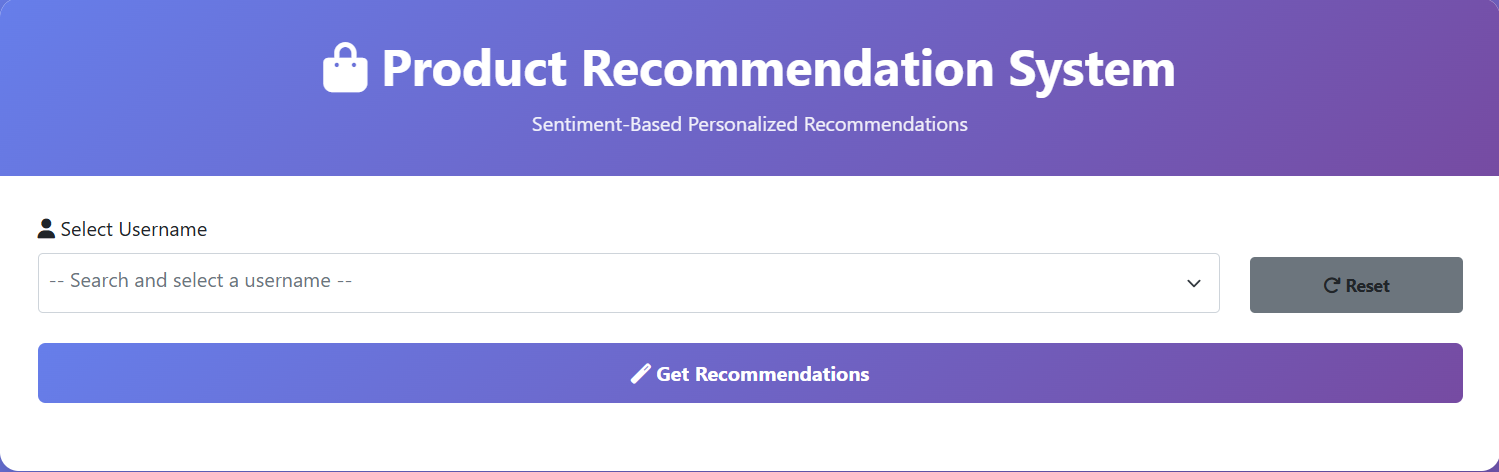

#### **Search and Selection of Username**

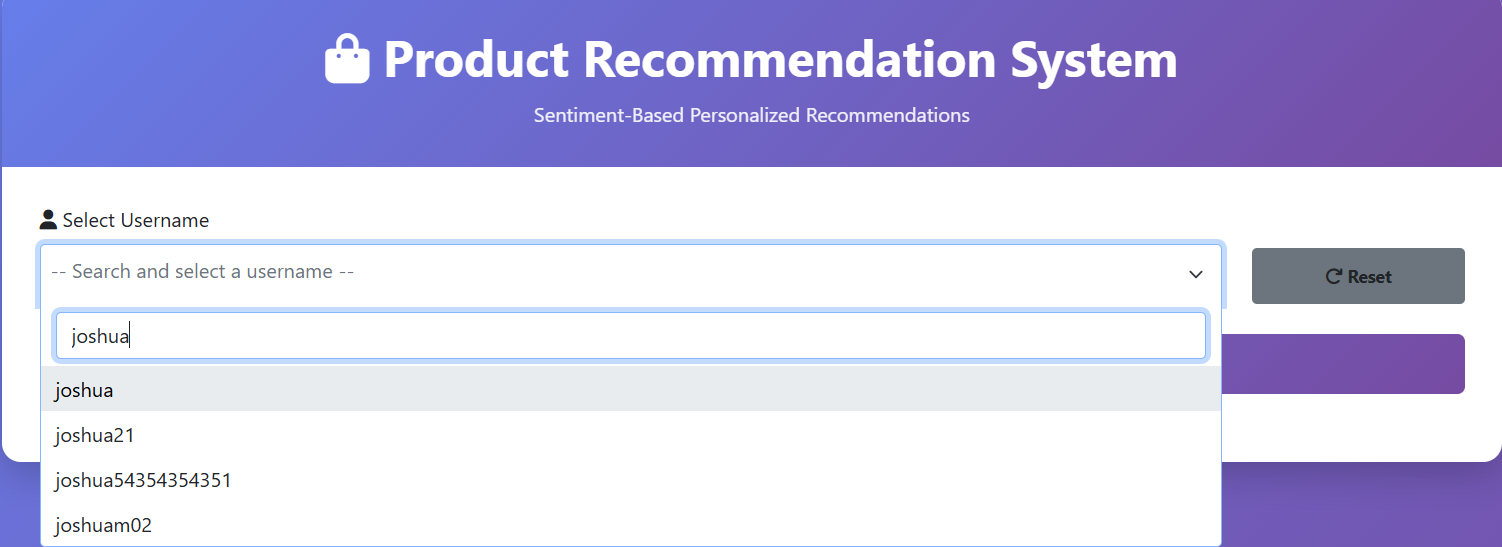

#### **Top 5 Recommendations**

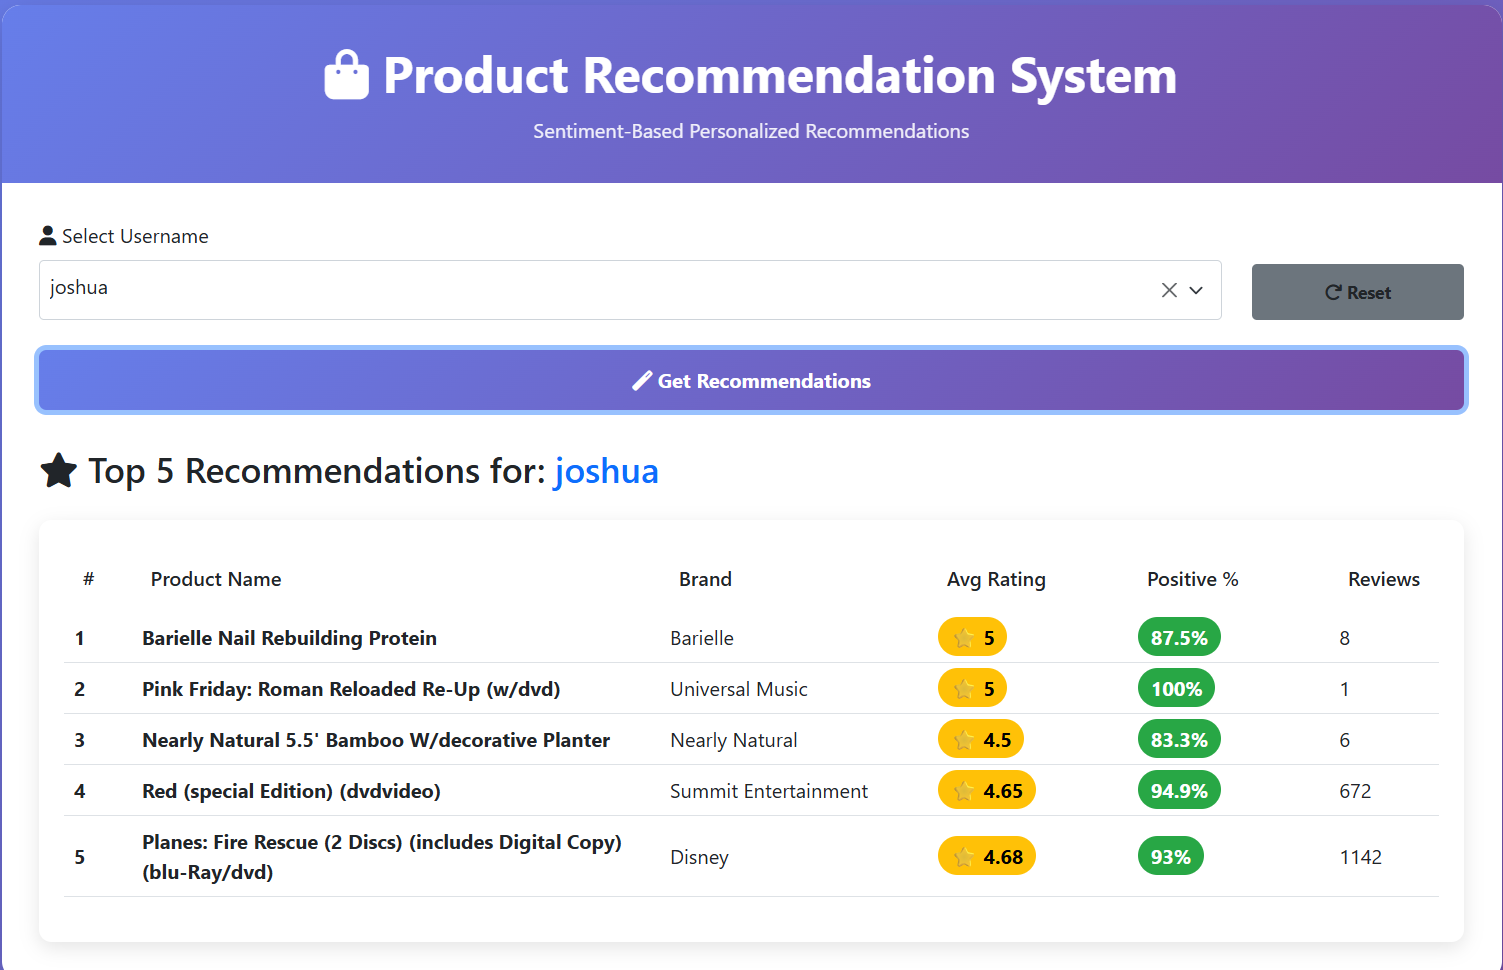